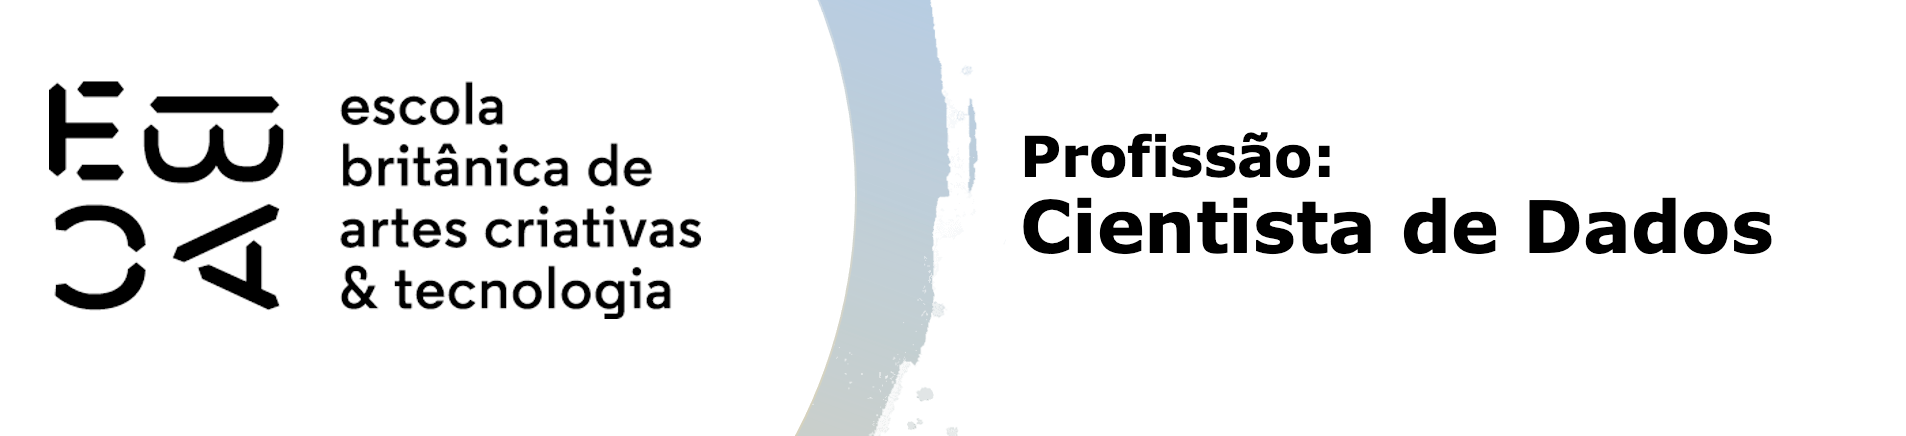

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from gower import gower_matrix
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head(1000)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,10.0,0,0.0,39,1152.500000,0.011966,0.017802,0.0,0.0,Mar,3,2,1,3,Returning_Visitor,False,False
996,10,164.5,1,3.0,61,2292.679762,0.000000,0.009552,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
997,0,0.0,0,0.0,9,329.000000,0.022222,0.044444,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
998,0,0.0,0,0.0,8,111.666667,0.000000,0.025000,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
uniques = df.nunique(axis=0)
print(uniques)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [8]:
df_clean = df.drop(['Browser','OperatingSystems','Region','TrafficType','VisitorType', 'ExitRates', 'PageValues'], axis=1)

In [9]:
df_2 = pd.get_dummies(df_clean.dropna())
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   SpecialDay               12330 non-null  float64
 8   Weekend                  12330 non-null  bool   
 9   Revenue                  12330 non-null  bool   
 10  Month_Aug                12330 non-null  bool   
 11  Month_Dec                12330 non-null  bool   
 12  Month_Feb                12330 non-null  bool   
 13  Month_Jul                12330 non-null  bool   
 14  Month_June            

In [10]:
vars_cat = [True if x in {'Weekend', 'Revenue', 'Month_Aug','Month_Dec','Month_Feb','Month_Jul','Month_June','Month_Mar','Month_May','Month_Nov','Month_Oct','Month_Sep'} else False for x in df_2.columns]

In [11]:
vars_cat

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [12]:
df_2.shape

(12330, 20)

## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [13]:
distancia_gower = gower_matrix(df_2, cat_features=vars_cat)

In [14]:
gdv = squareform(distancia_gower,force='tovector')

In [15]:
Z = linkage(gdv, method='complete')

In [16]:
df_2['grupo_3'] = fcluster(Z, 3, criterion='maxclust')
df_2.grupo_3.value_counts()

grupo_3
2    8366
3    3961
1       3
Name: count, dtype: int64

In [17]:
df_2['grupo_4'] = fcluster(Z, 4, criterion='maxclust')
df_2.grupo_4.value_counts()

grupo_4
2    8366
3    3363
4     598
1       3
Name: count, dtype: int64

In [18]:
df_date = df.reset_index().merge(df_2.reset_index(), how='left')

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [19]:
df_2.grupo_3.value_counts()

grupo_3
2    8366
3    3961
1       3
Name: count, dtype: int64

In [20]:
df_2.grupo_4.value_counts()

grupo_4
2    8366
3    3363
4     598
1       3
Name: count, dtype: int64

## Análise Descritiva das Compras Efetivadas pelos Grupos Durante a Semana e nos Finais de Semana:

In [21]:
df_date.groupby(['Weekend','Revenue', 'grupo_3'])['index'].count().unstack().fillna(0).style.format(precision=0)

In [22]:
df_date.groupby([ 'Weekend','Revenue', 'grupo_4'])['index'].count().unstack().fillna(0).style.format(precision=0)

In [29]:
df_date.groupby(['Weekend','BounceRates', 'grupo_3'])['index'].count().unstack().fillna(0).style.format(precision=0)

In [30]:
df_date.groupby([ 'Weekend','BounceRates', 'grupo_4'])['index'].count().unstack().fillna(0).style.format(precision=0)

## Análise Descritiva das Compras Efetivadas pelos Grupos nos Meses do Ano:

In [23]:
df_date.groupby([ 'Month','Revenue', 'grupo_4'])['index'].count().unstack().fillna(0).style.format(precision=0)

In [24]:
df_date.groupby([ 'Month','Revenue', 'grupo_4'])['index'].count().unstack().fillna(0).style.format(precision=0)

In [25]:
df_date.groupby([ 'SpecialDay','Month', 'grupo_4'])['index'].count().unstack().fillna(0).style.format(precision=0)

## Análise Descritiva com Relação a Navegação no Site pelos Grupos:

In [26]:
df_date.groupby([ 'ProductRelated', 'Revenue', 'grupo_4'])['index'].count().unstack().fillna(0).style.format(precision=0)

In [27]:
df_date.groupby([ 'Administrative', 'Revenue',  'grupo_3'])['index'].count().unstack().fillna(0).style.format(precision=0)

#### Com relação a escolha da quantidade de grupos, entre 3 e 4, no meu ponto de vista, a escolha pelo número de 4 grupos será mais efetiva. Pois, quando se adiciona 1 grupo a mais, além dos 3 pretendidos, percebe-se que o grupo 3 é subdividido em 2, ficando o grupo 3 condensado apenas nas pessoas que utilizaram os sites no mês de maio, com o restante sendo realocado no grupo 4. E nesse grupo, apenas em 3 ocasiões (em fevereiro) as compras foram efetivadas com sucesso.

#### A relação da quantidade de acesso em páginas administrativas com a efetuação de compra não possui muita relação. Porém, poucas pessoas com poucos acessos a páginas de produtos finalizam a compra de forma efetiva. No geral, é necessários mais acessos as páginas de produtos para que seja finalizada a compra com sucesso.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [28]:
df_date.groupby(['Revenue', 'grupo_4'])['index'].count().unstack().fillna(0).style.format(precision=0)

grupo_4,1,2,3,4
Revenue,,,,
False,3,6826,2998,595
True,0,1540,365,3


### De acordo com as análises, o grupo 2 é mas propenso a efetuar a compra do que os outros.